# By: Jeanette Henry

# Predict the onset of diabetes based on diagnostic measures using ANN
In this exercise we will build a simple ANN for a binary classification problem.   
Kaggle API command to download dataset:     
`kaggle datasets download -d uciml/pima-indians-diabetes-database`

Or Download from here: [https://www.kaggle.com/uciml/pima-indians-diabetes-database/data](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data)

In [46]:
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Input, Activation, Dense, Dropout, BatchNormalization
from keras.models import Model, load_model
import keras.backend as K
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers

In [47]:
from numpy.random import seed
seed(223)
from tensorflow import set_random_seed
set_random_seed(223)

In [48]:
filename = 'C:/MSDS/Deep/wk1/diabetes.csv'
#this is specific to my case. use your own path to the data
df = pd.read_csv(filename)
df.head() #shows the first 5 lines of your data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
df.info() #shows attributes and their properties. 
#seems there is no null value nor wrong data type such as string value 
#for numbers which sometimes happens

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
# Create X and Y in numpy array format from pandas dataframe 
Y = np.array(df['Outcome'])
X = np.array(df.drop('Outcome',axis=1))

In [51]:
# Check the X and Y shapes 
print(X.shape, Y.shape)

(768, 8) (768,)


In [52]:
# YOUR TURN
# Split the dataset to train and test set with the ratio of 80% train and 20% test
# hint : use sklearn train_test_split()
# use naming as X_train, Y_train for train data and X_test, Y_test for test data.
# Your Answer: 


# Check (print) the data shape for each
# Your Answer:

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, #features,
                                                    Y, #targets,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=None)

## Build a simple Keras model

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It can work with various software and hardware platforms. You can build and train neural network models easily without having to worry about how to handle those specific software/hardware platforms. For more info, see [Keras documentation](https://keras.io/).

We'll use the `Sequential()` model in Keras. 
The Sequential model is a linear stack of layers. You can create a Sequential model by passing a list of layer instances to the constructor.


```python
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
```
`input_shape=(784,)` means the data has 784 features (Just ignore this number for now).  
Or alternatively, you can add layers using .add() method to the layers object `model`.
```python
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))
```
This works too.
```python
l1 = Dense(32,input_dim=784)
l2 = Activation('relu')

model = Sequential([l1,l2])
```
You can wrap it in a function.
```python
def mymodel():
    model=Sequential()
    model.add(Dense(32,input_dim=784))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Activation('relu'))
    return model
```

For more info, see [About Keras Sequential Model](https://keras.io/getting-started/sequential-model-guide/).

In [54]:
# YOUR TURN
# build a model with 3 hidden layers (the first hidden layer is already given) and the output layer to classify (binary)
# which activation functions should you use for hidden layers and the output layer?
# Your Answer:


In [55]:
#From keras

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras.backend as K
K.clear_session()
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=8)) 
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


In [56]:
# prints out the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [57]:
# compile your model
# we use binary cross entropy since this problem is a binary classification problem. 
# let's add accuracy metric to display 
# we use adam optimizer (let's not worry about what is it for now. it's easier to use than other optimizers)


In [58]:
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

In [59]:
# YOUR TURN
# Fit your model on the train data using batch size 32 and for 20 epochs
# hint: use model.fit() function
# Your Answer:
# ?model.fit

In [66]:
history=model.fit(x_train, y_train, 
                  batch_size=32,
                  epochs=20)

Epoch 1/20
614/614 [==============================] - 0s 56us/step - loss: 0.4772 - acc: 0.7541
Epoch 2/20
614/614 [==============================] - 0s 63us/step - loss: 0.4944 - acc: 0.7443
Epoch 3/20
614/614 [==============================] - 0s 58us/step - loss: 0.5234 - acc: 0.7117
Epoch 4/20
614/614 [==============================] - 0s 57us/step - loss: 0.5000 - acc: 0.7313
Epoch 5/20
614/614 [==============================] - 0s 54us/step - loss: 0.4832 - acc: 0.7508
Epoch 6/20
614/614 [==============================] - 0s 66us/step - loss: 0.4731 - acc: 0.7557
Epoch 7/20
614/614 [==============================] - 0s 53us/step - loss: 0.4633 - acc: 0.7801
Epoch 8/20
614/614 [==============================] - 0s 67us/step - loss: 0.4610 - acc: 0.7736
Epoch 9/20
614/614 [==============================] - 0s 53us/step - loss: 0.4697 - acc: 0.7687
Epoch 10/20
614/614 [==============================] - 0s 64us/step - loss: 0.4606 - acc: 0.7769
Epoch 11/20
614/614 [==================

In [67]:
tst_score = model.evaluate(x_test, y_test)
print(tst_score)

154/154 [==============================] - 0s 55us/step
[0.62608670104633679, 0.74025974335608546]


In [68]:
train_score = model.evaluate(x_train, y_train)
print(train_score)

614/614 [==============================] - 0s 30us/step
[0.44545967575975659, 0.79641693791659729]


#  YOUR TURN

#  Q1. What was the best accuracy from the above result?
#  Your Answer:
### my best accuracy was epoch 19 at 78.18%
Epoch 19/20
614/614 [==============================] - 0s 61us/step 
- loss: 0.4574 
- acc: 0.7818
### Test accuracy was 74.0% and train score was 79.6%, slightly overfit

#  Q2. What happens if you change epochs? What is your optimal epochs?
#  Your Answer:
### my best accuracy increased, Epoch 44 was 81.11%
Epoch 44/50
614/614 [==============================] - 0s 58us/step 
- loss: 0.4178 
- acc: 0.8111
### Test accuracy was 74.7% and train score was 82.1%, so also overfit

In [69]:
mod1 = model.fit(x_train, y_train, 
                  batch_size=32,
                  epochs=50)

Epoch 1/50
614/614 [==============================] - 0s 56us/step - loss: 0.4639 - acc: 0.7671
Epoch 2/50
614/614 [==============================] - 0s 67us/step - loss: 0.4581 - acc: 0.7769
Epoch 3/50
614/614 [==============================] - 0s 51us/step - loss: 0.4517 - acc: 0.7883
Epoch 4/50
614/614 [==============================] - 0s 57us/step - loss: 0.4732 - acc: 0.7687
Epoch 5/50
614/614 [==============================] - 0s 55us/step - loss: 0.4560 - acc: 0.7834
Epoch 6/50
614/614 [==============================] - 0s 62us/step - loss: 0.4523 - acc: 0.8013
Epoch 7/50
614/614 [==============================] - 0s 53us/step - loss: 0.4449 - acc: 0.7997
Epoch 8/50
614/614 [==============================] - 0s 59us/step - loss: 0.4499 - acc: 0.7980
Epoch 9/50
614/614 [==============================] - 0s 61us/step - loss: 0.4498 - acc: 0.7964
Epoch 10/50
614/614 [==============================] - 0s 59us/step - loss: 0.4514 - acc: 0.7932
Epoch 11/50
614/614 [==================

In [70]:
tst_score = model.evaluate(x_test, y_test)
print(tst_score)

154/154 [==============================] - 0s 68us/step
[0.63895298753465923, 0.74675324907550567]


In [71]:
train_score = model.evaluate(x_train, y_train)
print(train_score)

614/614 [==============================] - 0s 35us/step
[0.40970837448629571, 0.8208469053433074]


## Have more control over your model hyperparameters
Above example showed how to build a sequential model. As you might know already from machine learning, learning rate is an important hyperparameter for taining. In the above example, `.compile()` used the Adam optimizer by calling the optimizer name `'adam'` (string).  
```python
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])
```
Under the hood, if you call the string 'adam', it calls the optimizer Adam (keras.optimizers.Adam) and uses default options (e.g. learning rate is 0.001). Check the [optimizer](https://keras.io/optimizers/) documentation for more details. Since we'd like to control the learning rate, we can instantiate an adam optimizer (and change the learning rate) by
```python
adam = optimizers.Adam(lr=0.005)
```
and use in the `.compile()` 

# YOUR TURN
# instantiate your previous model again without compiling yet,
# Your Answer:
### my first model is "mod1"


In [75]:
print(mod1)

instantiate your adam optimizer and change the learning rate to 0.01 and compile
Your Answer:

Note: it's a good idea to wrap models in a function, especially working with jupyter notebook because running cells here and there can mess up.

In [ ]:
# YOUR TURN
# fit the model
# Your Answer:


In [80]:
K.clear_session()
adamB = optimizers.Adam(lr=0.005)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=8)) 
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=(optimizers.Adam(lr=0.01)),
              loss ='binary_crossentropy',
              metrics=['accuracy'])
mod2 = model.fit(x_train, y_train, 
                  batch_size=32,
                  epochs=50)

Epoch 1/50
614/614 [==============================] - 0s 608us/step - loss: 0.6615 - acc: 0.6336
Epoch 2/50
614/614 [==============================] - 0s 50us/step - loss: 0.6327 - acc: 0.6726
Epoch 3/50
614/614 [==============================] - 0s 49us/step - loss: 0.6334 - acc: 0.6580
Epoch 4/50
614/614 [==============================] - 0s 57us/step - loss: 0.6202 - acc: 0.6531
Epoch 5/50
614/614 [==============================] - 0s 51us/step - loss: 0.6480 - acc: 0.6059
Epoch 6/50
614/614 [==============================] - 0s 52us/step - loss: 0.6340 - acc: 0.6515
Epoch 7/50
614/614 [==============================] - 0s 52us/step - loss: 0.6538 - acc: 0.6205
Epoch 8/50
614/614 [==============================] - 0s 53us/step - loss: 0.6850 - acc: 0.5977
Epoch 9/50
614/614 [==============================] - 0s 60us/step - loss: 0.6668 - acc: 0.6531
Epoch 10/50
614/614 [==============================] - 0s 58us/step - loss: 0.6493 - acc: 0.6531
Epoch 11/50
614/614 [=================

In [81]:
tst_score = model.evaluate(x_test, y_test)
print(tst_score)

154/154 [==============================] - 0s 195us/step
[0.65613707396891208, 0.64285714208305655]


In [82]:
train_score = model.evaluate(x_train, y_train)
print(train_score)

614/614 [==============================] - 0s 34us/step
[0.64817874206393855, 0.6530944627348686]


YOUR TURN

# Using your model(s) above, tweak learning rate, epoch, and batch size
# Q3. Observe the relationship between the learning rate and epoch. 
## Q3a. If you reduce the learning rate, what happens to the epochs needed to achieve the same accuracy?
- lr=0.00001 loss ~0.59 accuracy ~66%
- lr=.0000000001 loss ~ 0.96 caused very low accuracy (~38%)
## Q3b. If you increase the learning rate, at some point does it fail?
- lr=0.9 causes loss ~5.0 accuracy ~65%
- lr= 10 causes loss ~10.4 accuracy ~34%
- lr=1000000000 still did not fail
- lr=100000000000000000000 - loss: nan - acc: 0.0244 for first epoch then fails with  acc: 0.0000e+00 for all other epochs
## Q3c. Find a sweet spot (may not be unique)
- lr=.00010 loss: 0.4976 - acc: 0.7720
- lr=.00032 loss: 0.4732 - acc: 0.7834
- lr=.00040 loss: 0.4504 - acc: 0.7980
- lr=.00045 loss: 0.3916 - acc: 0.8371
- lr=.00050 loss: 0.4269 - acc: 0.8290
- lr=.00055 loss: 0.3927 - acc: 0.8127
- lr=.00075 loss: 0.4600 - acc: 0.7752
### Learning rate of .0045 gave me the best accuracy with 83.71%

# Q4. Change the number of elements in layers and add more layers. Adjust learning rate, and other hyperparameters as necessary.
## Q4a. What is your best configuation?
## Q4b. What is your best train accuracy?

In [152]:
K.clear_session()

In [154]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=8)) 
model.add(Dense(64, activation='tanh'))
model.add(Dense(36, activation='relu'))
model.add(Dense(36, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=(optimizers.Adam(lr=.00045)),
              loss ='binary_crossentropy',
              metrics=['accuracy'])
mod2 = model.fit(x_train, y_train, 
                  batch_size=32,
                  epochs=200)

Epoch 1/200
614/614 [==============================] - 0s 787us/step - loss: 0.6847 - acc: 0.5977
Epoch 2/200
614/614 [==============================] - 0s 58us/step - loss: 0.6185 - acc: 0.6515
Epoch 3/200
614/614 [==============================] - 0s 56us/step - loss: 0.5948 - acc: 0.6612
Epoch 4/200
614/614 [==============================] - 0s 56us/step - loss: 0.5832 - acc: 0.6792
Epoch 5/200
614/614 [==============================] - 0s 65us/step - loss: 0.5726 - acc: 0.6987
Epoch 6/200
614/614 [==============================] - 0s 58us/step - loss: 0.5638 - acc: 0.7117
Epoch 7/200
614/614 [==============================] - 0s 64us/step - loss: 0.5614 - acc: 0.6954
Epoch 8/200
614/614 [==============================] - 0s 63us/step - loss: 0.5557 - acc: 0.7166
Epoch 9/200
614/614 [==============================] - 0s 57us/step - loss: 0.5563 - acc: 0.7101
Epoch 10/200
614/614 [==============================] - 0s 69us/step - loss: 0.5650 - acc: 0.7020
Epoch 11/200
614/614 [======

614/614 [==============================] - 0s 57us/step - loss: 0.2551 - acc: 0.9121
Epoch 167/200
614/614 [==============================] - 0s 56us/step - loss: 0.2758 - acc: 0.8697
Epoch 168/200
614/614 [==============================] - 0s 56us/step - loss: 0.2897 - acc: 0.8697
Epoch 169/200
614/614 [==============================] - 0s 75us/step - loss: 0.2594 - acc: 0.8909
Epoch 170/200
614/614 [==============================] - 0s 62us/step - loss: 0.2564 - acc: 0.8795
Epoch 171/200
614/614 [==============================] - 0s 60us/step - loss: 0.2972 - acc: 0.8697
Epoch 172/200
614/614 [==============================] - 0s 70us/step - loss: 0.3161 - acc: 0.8599
Epoch 173/200
614/614 [==============================] - 0s 69us/step - loss: 0.3159 - acc: 0.8518
Epoch 174/200
614/614 [==============================] - 0s 64us/step - loss: 0.2842 - acc: 0.8616
Epoch 175/200
614/614 [==============================] - 0s 65us/step - loss: 0.2643 - acc: 0.8795
Epoch 176/200
614/614 [=

In [155]:
tst_score = model.evaluate(x_test, y_test)
print(tst_score)

154/154 [==============================] - 0s 256us/step
[1.0593324535852904, 0.64935065244699453]


In [156]:
train_score = model.evaluate(x_train, y_train)
print(train_score)

614/614 [==============================] - 0s 35us/step
[0.19721443140545575, 0.91368078175895762]


# The above model gives me a great train accuracy with 91.3% but the test accuracy is only 64.9% so it is over-fit :(

## Check the test accuracy

In [157]:
Y_pred = model.predict(x_test) #prediction probability 
Y_class = Y_pred.round().reshape(y_test.shape) # round up probabilities and reshape the array
print(y_test.shape, Y_class.shape)

(154,) (154,)


In [158]:
def acc(yp, yt):
    assert yp.shape==yt.shape, 'shape of yp and yt do not match'
    return np.mean(yp == yt)

In [ ]:
# YOUR TURN
# print out the test accuracy 
# Your Answer:

# Q5. Is the test accuracy as good as the train accuracy? 
# Your Answer:

# I showed how to find train accuracy with model.evaluate above, however here is another way with sklearn and how to get a confusion matrix

In [173]:
#print(Y_pred)

In [174]:
#print(Y_class)

In [172]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_class)

0.64935064935064934

In [166]:
#confusion matrix

#sklearn.metrics.confusion_matrix(y_true, y_pred, 
#labels=None, sample_weight=None)
import sklearn
cnf_matrix = sklearn.metrics.confusion_matrix(y_test,
                                              Y_class,
                                              labels=None, 
                                              sample_weight=None)
print(cnf_matrix)

[[74 25]
 [29 26]]


In [176]:
#precision

from sklearn.metrics import precision_score
precision_score(y_test, Y_class, average='weighted')

0.64393135895134757

## Monitor validation loss
You can also monitor validation loss and validation metric (accuracy in our example) by adding an option ` validation_split` to the `.fit()` function. 

 YOUR TURN
## Refer to Keras documentation and add validation_split to .fit() and run training
 Your Answer: see below

## Q6. What do you observe in train and validation accuraceis? Is there an overfit?
 Your Answer:
 ### Yes, there is an overfit because the train accuracy is higher than the validation by over 10%

## Q7. Change your hyperparameters to maximize your validation accuracy. What are your best configuations?
 Your Answer:

In [185]:
K.clear_session()

In [190]:
checkpoint = ModelCheckpoint('3_layer_dense.h5', monitor='val_loss', save_best_only=True)
cb = [checkpoint]
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=8)) 
model.add(Dense(64, activation='tanh'))
model.add(Dense(36, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=(optimizers.Adam(lr=.00045)),
              loss ='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                  batch_size=32,
                  epochs=200,
                validation_split=0.2,
                    callbacks=cb)

Train on 491 samples, validate on 123 samples
Epoch 1/200
491/491 [==============================] - 0s 976us/step - loss: 0.6983 - acc: 0.5804 - val_loss: 0.6709 - val_acc: 0.6098
Epoch 2/200
491/491 [==============================] - 0s 60us/step - loss: 0.6195 - acc: 0.6599 - val_loss: 0.6143 - val_acc: 0.6179
Epoch 3/200
491/491 [==============================] - 0s 67us/step - loss: 0.5891 - acc: 0.6660 - val_loss: 0.5987 - val_acc: 0.6260
Epoch 4/200
491/491 [==============================] - 0s 73us/step - loss: 0.5807 - acc: 0.6680 - val_loss: 0.5943 - val_acc: 0.6423
Epoch 5/200
491/491 [==============================] - 0s 62us/step - loss: 0.5776 - acc: 0.7026 - val_loss: 0.5871 - val_acc: 0.6341
Epoch 6/200
491/491 [==============================] - 0s 63us/step - loss: 0.5660 - acc: 0.7108 - val_loss: 0.5856 - val_acc: 0.6341
Epoch 7/200
491/491 [==============================] - 0s 59us/step - loss: 0.5568 - acc: 0.7271 - val_loss: 0.5973 - val_acc: 0.6098
Epoch 8/200
491

491/491 [==============================] - 0s 86us/step - loss: 0.3296 - acc: 0.8432 - val_loss: 0.6586 - val_acc: 0.6829
Epoch 122/200
491/491 [==============================] - 0s 85us/step - loss: 0.3407 - acc: 0.8330 - val_loss: 0.6532 - val_acc: 0.7154
Epoch 123/200
491/491 [==============================] - 0s 84us/step - loss: 0.3461 - acc: 0.8452 - val_loss: 0.6266 - val_acc: 0.7154
Epoch 124/200
491/491 [==============================] - 0s 75us/step - loss: 0.3367 - acc: 0.8330 - val_loss: 0.6401 - val_acc: 0.7073
Epoch 125/200
491/491 [==============================] - 0s 81us/step - loss: 0.3085 - acc: 0.8493 - val_loss: 0.6633 - val_acc: 0.6829
Epoch 126/200
491/491 [==============================] - 0s 74us/step - loss: 0.3311 - acc: 0.8371 - val_loss: 0.6510 - val_acc: 0.6829
Epoch 127/200
491/491 [==============================] - 0s 84us/step - loss: 0.3454 - acc: 0.8310 - val_loss: 0.6278 - val_acc: 0.6992
Epoch 128/200
491/491 [==============================] - ETA: 

491/491 [==============================] - 0s 63us/step - loss: 0.2503 - acc: 0.9002 - val_loss: 0.7943 - val_acc: 0.6504
Epoch 182/200
491/491 [==============================] - 0s 58us/step - loss: 0.2491 - acc: 0.8880 - val_loss: 0.8083 - val_acc: 0.6911
Epoch 183/200
491/491 [==============================] - 0s 65us/step - loss: 0.2624 - acc: 0.8819 - val_loss: 0.7507 - val_acc: 0.6992
Epoch 184/200
491/491 [==============================] - 0s 64us/step - loss: 0.2450 - acc: 0.8880 - val_loss: 0.8410 - val_acc: 0.6179
Epoch 185/200
491/491 [==============================] - 0s 61us/step - loss: 0.2489 - acc: 0.8880 - val_loss: 0.7869 - val_acc: 0.6829
Epoch 186/200
491/491 [==============================] - 0s 66us/step - loss: 0.2405 - acc: 0.8961 - val_loss: 0.7868 - val_acc: 0.6585
Epoch 187/200
491/491 [==============================] - 0s 75us/step - loss: 0.2277 - acc: 0.9063 - val_loss: 0.8452 - val_acc: 0.6341
Epoch 188/200
491/491 [==============================] - 0s 74

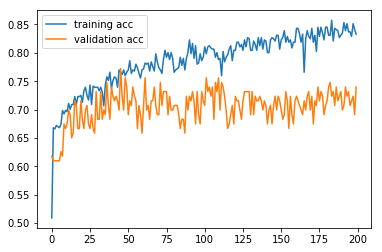

In [189]:
plt.plot(history.history['acc'], label = 'training acc')
plt.plot(history.history['val_acc'], label = 'validation acc')
plt.legend()
plt.show()

In [224]:
K.clear_session()

In [225]:
%%capture
checkpoint = ModelCheckpoint('3_layer_dense.h5', monitor='val_loss', save_best_only=True)
cb = [checkpoint]
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=8)) 
model.add(Dense(15, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=(optimizers.Adam(lr=.0005)),
              loss ='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                  batch_size=32,
                  epochs=200,
                validation_split=0.2,
                    callbacks=cb)


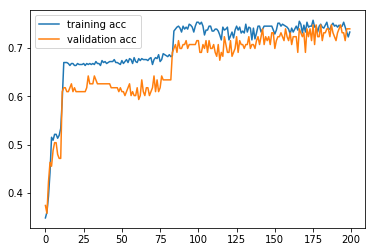

In [226]:
plt.plot(history.history['acc'], label = 'training acc')
plt.plot(history.history['val_acc'], label = 'validation acc')
plt.legend()
plt.show()

In [227]:
tst_score = model.evaluate(x_test, y_test)
print(tst_score)

154/154 [==============================] - 0s 59us/step
[0.60227290376440268, 0.72727272417638211]


In [228]:
train_score = model.evaluate(x_train, y_train)
print(train_score)

614/614 [==============================] - 0s 33us/step
[0.51191548124586717, 0.75081433244170892]


# There is much less bias train accuracy 75% test 72%